In [36]:
import gzip
import numpy as np
import matplotlib.pyplot as plt


def training_images():
    with gzip.open('train-images-idx3-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        
        images = np.frombuffer(image_data, dtype=np.uint8)\
        .reshape((image_count, row_count, column_count))
        return images

def testing_images():
    with gzip.open('t10k-images-idx3-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        
        images = np.frombuffer(image_data, dtype=np.uint8)\
        .reshape((image_count, row_count, column_count))
        return images


def training_labels():
    with gzip.open('train-labels-idx1-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels
    
def testing_labels():
    with gzip.open('t10k-labels-idx1-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        label_count = int.from_bytes(f.read(4), 'big')
        label_data = f.read()
        labels = np.frombuffer(label_data, dtype=np.uint8)
        return labels
    

img_train1= training_images()
img_test1= testing_images()
labels_test= testing_labels()
labels_train=training_labels()



In [37]:
def training1_images():
    with gzip.open('train-images-idx3-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        
        images = np.frombuffer(image_data, dtype=np.uint8)\
        .reshape((image_count, row_count*column_count))
        return images


def testing1_images():
    with gzip.open('t10k-images-idx3-ubyte.gz', 'r') as f:
        magic_number = int.from_bytes(f.read(4), 'big')
        image_count = int.from_bytes(f.read(4), 'big')
        row_count = int.from_bytes(f.read(4), 'big')
        column_count = int.from_bytes(f.read(4), 'big')
        image_data = f.read()
        
        images = np.frombuffer(image_data, dtype=np.uint8)\
        .reshape((image_count, row_count* column_count))
        return images


# trainImg=training1_images()
# testImg=testing1_images()
img_train=training1_images()
img_test= testing1_images()
print('done')

done


In [38]:
imgArray = img_train.reshape([1,60000,784])
finalIndex =[]
for i in range(100):
    b1 = img_test[i]
    testArray= b1.reshape([1,1,784])
    diff= imgArray - testArray
    sq = np.square(diff)
    dist = sq.sum(axis= 2)
    q =np.argmin(dist[0], axis=0)
    finalIndex.append(q)
print(finalIndex)
count=0
j=0

for i in finalIndex:
    if(labels_train[i]==labels_test[j]):
        count+=1
    j+=1
acurracy=(count/100)*100
print(acurracy)

[52124, 58876, 3966, 24993, 31962, 4557, 46048, 14866, 29048, 1529, 13650, 17592, 36196, 43024, 16376, 44346, 1328, 17592, 16676, 59420, 43024, 29048, 59420, 49270, 26671, 59420, 42934, 29048, 58973, 41029, 13537, 35328, 38840, 16676, 14866, 8895, 17254, 20047, 54393, 53610, 44542, 56348, 9618, 39173, 16233, 23056, 50016, 10205, 10236, 33522, 20620, 33522, 55543, 55543, 50744, 57991, 50319, 23176, 33522, 18468, 50016, 21196, 16376, 55513, 29048, 34403, 29048, 29048, 7188, 52374, 58932, 12398, 51133, 11037, 51439, 52124, 24828, 29048, 23176, 14866, 55543, 33522, 11037, 46104, 29048, 25268, 30433, 52244, 31762, 21594, 13650, 3412, 24536, 57979, 21594, 13650, 51300, 53610, 58240, 46104]
30.0


<class 'numpy.ndarray'> 3 (60000, 28, 28) uint8


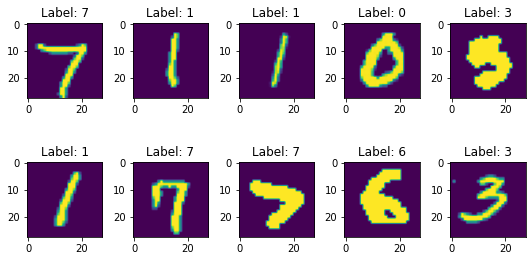

In [5]:
print(type(img_train1), img_train1.ndim, img_train1.shape, img_train1.dtype)
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(img_train1[finalIndex[i]])
    ax.set_title('Label: {}'.format(labels_train[finalIndex[i]]))
    
plt.tight_layout()
plt.show()

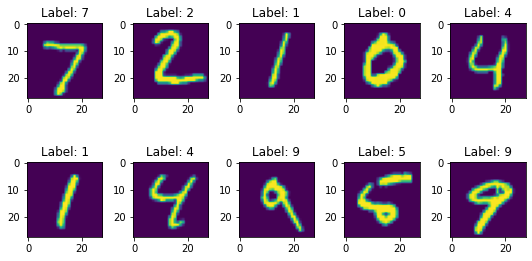

In [6]:
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(img_test1[i])
    ax.set_title('Label: {}'.format(labels_test[i]))
    
plt.tight_layout()
plt.show()

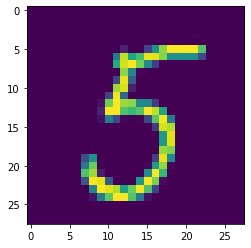

In [7]:
plt.imshow(img_test1[253])

In [8]:
arr_n = [[] for i in range(10)]
num =[]
count=0
for i,label in enumerate(labels_train):
    arr_n[label].append(img_train[i].astype(float))

print(len(arr_n))
for i in arr_n:
    print(len(i))


10
5923
6742
5958
6131
5842
5421
5918
6265
5851
5949


In [9]:
arr0=arr_n[0][:][:]

rows, cols = (1, 784)
arr = [[0]*cols]*rows
for i in range(5923):
    for j in range(784):
        arr[0][j]+=arr0[i][j]
newList = []
myInt=5923
for x in arr[0]:
    newList.append(x/myInt)
x = np.reshape(newList, (28, 28))

ans = []
ans.append(x)

In [10]:
arr1=arr_n[1][:][:]
print(len(arr1))
rows, cols = (1, 784)
arr_1 = [[0]*cols]*rows
for i in range(6742):
    for j in range(784):
        arr_1[0][j]+=arr1[i][j]
        
newList1 = []
myInt1=6742
for x in arr_1[0]:
    newList1.append(x/myInt1)
x1 = np.reshape(newList1, (28, 28))

ans.append(x1)

6742


In [11]:
arr2=arr_n[2][:][:]

rows, cols = (1, 784)
arr_2 = [[0]*cols]*rows
for i in range(5958):
    for j in range(784):
        arr_2[0][j]+=arr2[i][j]
        
newList2 = []
myInt2=5958
for x in arr_2[0]:
    newList2.append(x/myInt2)
x2 = np.reshape(newList2, (28, 28))

ans.append(x2)

In [12]:
arr3=arr_n[3][:][:]

rows, cols = (1, 784)
arr_3 = [[0]*cols]*rows
for i in range(6131):
    for j in range(784):
        arr_3[0][j]+=arr3[i][j]
        
newList3 = []
myInt3=6131
for x in arr_3[0]:
    newList3.append(x/myInt3)
x3 = np.reshape(newList3, (28, 28))

ans.append(x3)

In [13]:
arr4=arr_n[4][:][:]

rows, cols = (1, 784)
arr_4 = [[0]*cols]*rows
for i in range(5842):
    for j in range(784):
        arr_4[0][j]+=arr4[i][j]
        
newList4 = []
myInt4=5842
for x in arr_4[0]:
    newList4.append(x/myInt4)
x4 = np.reshape(newList4, (28, 28))

ans.append(x4)

In [14]:
arr5=arr_n[5][:][:]

rows, cols = (1, 784)
arr_5 = [[0]*cols]*rows
for i in range(5421):
    for j in range(784):
        arr_5[0][j]+=arr5[i][j]
        
newList5 = []
myInt5=5421
for x in arr_5[0]:
    newList5.append(x/myInt5)
x5 = np.reshape(newList5, (28, 28))

ans.append(x5)

In [15]:
arr6=arr_n[6][:][:]

rows, cols = (1, 784)
arr_6 = [[0]*cols]*rows
for i in range(5918):
    for j in range(784):
        arr_6[0][j]+=arr6[i][j]
        
newList6 = []
myInt6=5918
for x in arr_6[0]:
    newList6.append(x/myInt6)
x6 = np.reshape(newList6, (28, 28))

ans.append(x6)

In [16]:
arr7=arr_n[7][:][:]

rows, cols = (1, 784)
arr_7 = [[0]*cols]*rows
for i in range(6265):
    for j in range(784):
        arr_7[0][j]+=arr7[i][j]
        
newList7 = []
myInt7=6265
for x in arr_7[0]:
    newList7.append(x/myInt7)
x7 = np.reshape(newList7, (28, 28))

ans.append(x7)

In [17]:
arr8=arr_n[8][:][:]

rows, cols = (1, 784)
arr_8 = [[0]*cols]*rows
for i in range(5851):
    for j in range(784):
        arr_8[0][j]+=arr8[i][j]
        
newList8 = []
myInt8=5851
for x in arr_8[0]:
    newList8.append(x/myInt8)
x8 = np.reshape(newList8, (28, 28))

ans.append(x8)

In [18]:
arr9=arr_n[9][:][:]

rows, cols = (1, 784)
arr_9 = [[0]*cols]*rows
for i in range(5949):
    for j in range(784):
        arr_9[0][j]+=arr9[i][j]
        
newList9 = []
myInt9=5949
for x in arr_9[0]:
    newList9.append(x/myInt9)
x9 = np.reshape(newList9, (28, 28))

ans.append(x9)

In [49]:
arr_n = [[] for i in range(10)]
num =[]
count=0
for i,label in enumerate(labels_train):
    arr_n[label].append(img_train[i].astype(float))

print(len(arr_n))
for i in arr_n:
    print(len(i))

ans1=[]
newList1 = []
for k in range(10):
    arr= []
    arr=arr_n[k][:][:]
    myInt=len(arr_n[k])
    rows, cols = (1, 784)
    arr_ = [[0]*cols]*rows
    for i in range(myInt):
        for j in range(784):
            arr_[0][j]+=arr[i][j]   
    newList = []
    for x in arr_[0]:
        newList.append(x/myInt)
        newList1.append(newList)
    x = np.reshape(newList, (28, 28))
    ans1.append(x)
newList01 = np.array(newList1)    
print(newList01.shape)

    

10
5923
6742
5958
6131
5842
5421
5918
6265
5851
5949
(7840, 784)


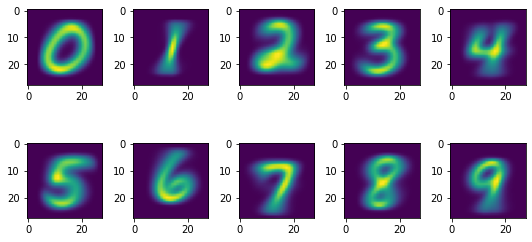

In [26]:
num_row = 2
num_col = 5
fig, axes = plt.subplots(num_row, num_col, figsize=(1.5*num_col,2*num_row))
for i in range(10):
    ax = axes[i//num_col, i%num_col]
    ax.imshow(ans1[i])

plt.tight_layout()
plt.show()


In [41]:

print(len(newList1))

imgArray = newList1.reshape([1,10,784])
finalIndex =[]
labelsNewList = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for i in range(100):
    b1 = img_test[i]
    testArray= b1.reshape([1,1,784])
    diff= imgArray - testArray
    sq = np.square(diff)
    dist = sq.sum(axis= 2)
    q =np.argmin(dist[0], axis=0)
    finalIndex.append(q)
print(finalIndex)
count=0
j=0

for i in finalIndex:
    if(labelsNewList[i]==labels_test[j]):
        count+=1
    j+=1
acurracy=(count/100)*100
print(acurracy)

7840


ValueError: cannot reshape array of size 6146560 into shape (1,10,784)